In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import os

In [2]:
from scipy import stats
import researchpy as rp
from sklearn.preprocessing import PowerTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import xgboost as xgb

In [3]:
train=pd.read_csv("C://Users//User//Documents//Python_Projects//kaggle_fct//datasets//train.csv")
test=pd.read_csv("C://Users//User//Documents//Python_Projects//kaggle_fct//datasets//test.csv")

In [4]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [5]:
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#숫자형 변수만 따로 추출한다.
train_num=train.iloc[:,1:11]
test_num=test.iloc[:,1:11]

In [8]:
#정규분포 맞춰주기+표준화
pt=PowerTransformer()
pt.fit(train_num)
train_trans=pt.transform(train_num)
pt.fit(test_num)
test_trans=pt.transform(test_num)

In [9]:
train_num_df=pd.DataFrame(train_trans, columns=train_num.columns)
train_num_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,-0.333124,-0.929240,-1.994699,0.436979,-0.813135,-1.050849,0.127692,0.522247,0.256486,2.660631
1,-0.347866,-0.855788,-2.258050,0.243070,-1.042117,-1.296662,0.086805,0.696568,0.324383,2.643539
2,0.167820,0.056447,-0.860378,0.476284,0.331778,1.144305,0.704811,0.877686,-0.034945,2.610301
3,0.122846,0.194372,0.297617,0.372114,1.074683,1.101616,0.900164,0.877686,-0.321573,2.639090
4,-0.335580,-1.022553,-2.258050,-0.047739,-0.845792,-1.294392,0.086805,0.637715,0.301725,2.626654


In [10]:
test_num_df=pd.DataFrame(test_trans, columns=test_num.columns)
test_num_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,-1.103768,1.473489,0.144209,-2.272567,-0.765932,0.395858,-0.805786,-0.645807,0.325801,2.416701
1,-1.094922,-2.272107,0.008782,-2.272567,-0.765932,0.378865,-0.629869,-0.548407,0.217048,2.426431
2,-1.004928,-1.543275,0.274385,-2.272567,-0.765932,0.557708,-0.440792,-0.919501,-0.184899,2.317325
3,-1.017090,-1.349935,0.520961,-2.272567,-0.765932,0.541759,-0.361335,-1.205748,-0.499387,2.327377
4,-1.026178,-1.245987,0.751783,-2.272567,-0.765932,0.525712,-0.279631,-1.424875,-0.756306,2.337395


c:\users\user\anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


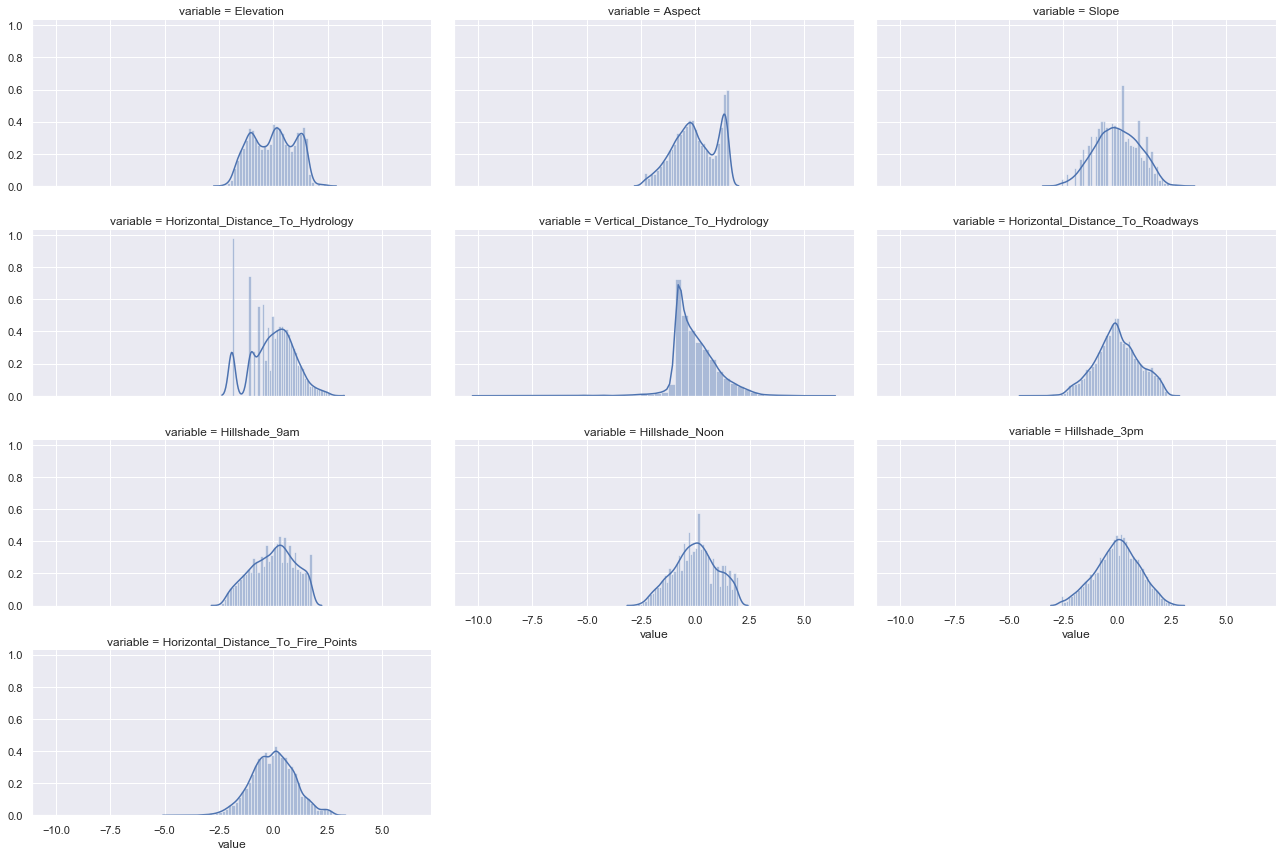

In [11]:
#분포를 확인한다.
g = sns.FacetGrid(train_num_df.melt(), col="variable", col_wrap=3, aspect=2)
g.map(sns.distplot,"value")

plt.show()

In [12]:
#훈련데이터 정렬?
train_x=train_num_df
train_y=train["Cover_Type"]

#테스트데이터 정렬?
test_x=test_num_df

In [13]:
#모델을 훈련시킨다.
ovr_clf=OneVsRestClassifier(RandomForestClassifier(n_estimators=211, criterion='entropy', random_state=523))
ovr_scores = cross_val_score(ovr_clf, train_x, train_y, cv=10)
print('Scores =', ovr_scores)

Scores = [0.70502646 0.75132275 0.75       0.73148148 0.74404762 0.73544974
 0.7255291  0.77248677 0.8207672  0.79298942]


In [14]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(ovr_scores), np.std(ovr_scores)))

CV accuracy: 0.753 +/- 0.032


In [15]:
#모델을 훈련시킨다.
rf_clf=RandomForestClassifier(n_estimators=211, criterion='entropy', random_state=523)
rf_scores = cross_val_score(rf_clf, train_x, train_y, cv=10)
print('Scores =', rf_scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(rf_scores), np.std(rf_scores)))

Scores = [0.7010582  0.75859788 0.75462963 0.73544974 0.74470899 0.73611111
 0.72751323 0.7744709  0.83399471 0.81481481]
CV accuracy: 0.758 +/- 0.038


In [16]:
rf_clf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=211, n_jobs=None,
            oob_score=False, random_state=523, verbose=0, warm_start=False)

In [17]:
rf_clf.feature_importances_

array([0.45898112, 0.0480153 , 0.03228461, 0.06246382, 0.049301  ,
       0.12859642, 0.05253683, 0.04007311, 0.0366203 , 0.09112748])

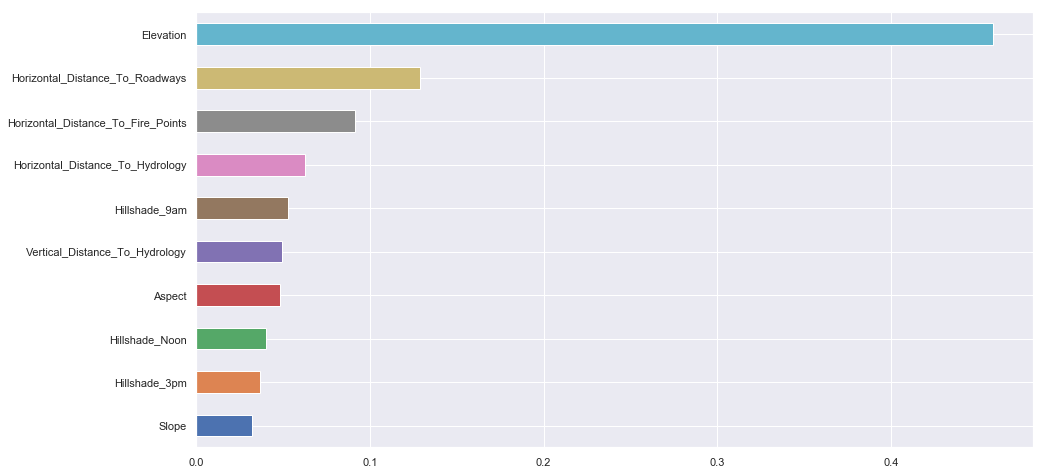

In [18]:
feat_importances = pd.Series(rf_clf.feature_importances_, index=train_x.columns)

plt.rcParams['figure.figsize'] = [15, 8]
feat_importances.sort_values().plot(kind='barh')
plt.savefig('rf_num_varImp.png')

In [19]:
#명목형 변수를 살펴본다.
train_cat=train.iloc[:,11:56]
train_cat_df=pd.DataFrame(train_cat, columns=train_cat.columns)


In [20]:
train_cat_df.head()

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [21]:
train_table=train_cat_df.groupby(["Cover_Type"]).sum()
train_table

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,1062,181,917,0,0,0,0,5,0,0,...,114,230,184,0,3,0,0,80,79,49
2,1134,66,940,20,0,3,12,20,0,7,...,97,255,184,12,1,2,0,7,3,3
3,0,0,863,1297,121,283,133,462,55,248,...,0,5,0,0,0,0,0,0,0,0
4,0,0,0,2160,139,94,799,133,39,244,...,0,0,0,0,0,0,0,0,0,0
5,856,0,1304,0,0,61,0,129,0,0,...,87,100,115,4,0,0,0,0,0,0
6,0,0,962,1198,95,182,18,87,71,151,...,7,30,66,2,0,0,0,0,0,0
7,545,252,1363,0,0,0,0,7,0,0,...,27,70,67,4,98,8,34,641,575,407


In [22]:
m = pd.melt(train_cat_df, id_vars=['Cover_Type'], var_name='Type')
m.head()


,Cover_Type,Type,value
0,5,Wilderness_Area1,1
1,5,Wilderness_Area1,1
2,2,Wilderness_Area1,1
3,2,Wilderness_Area1,1
4,5,Wilderness_Area1,1


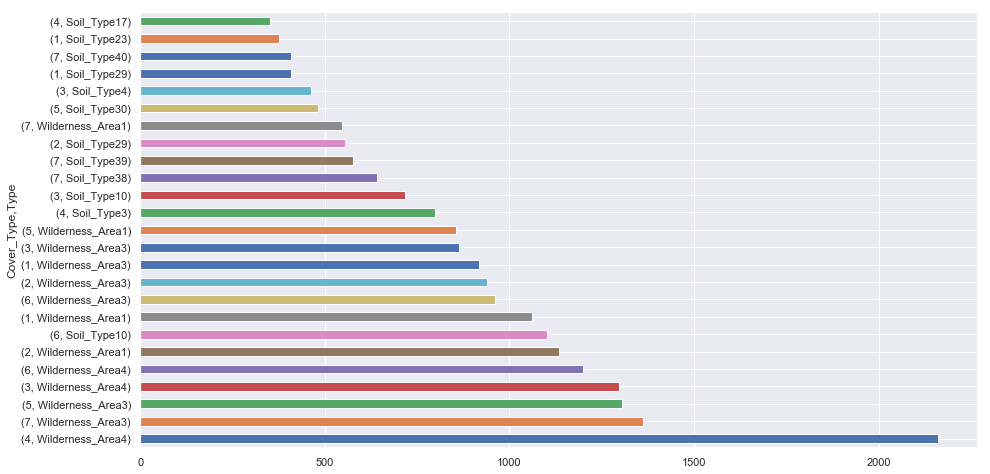

In [23]:
g_sum=m.groupby(['Cover_Type','Type'])['value'].sum()

plt.rcParams['figure.figsize'] = [15, 8]
g_sum.nlargest(25).plot(kind="barh")

plt.savefig('cat_eda.png')

In [24]:
#테스트 변수의 명목형 변수 묶음을 만들어준다.
test_cat=test.iloc[:,11:55]
test_cat_df=pd.DataFrame(test_cat, columns=test_cat.columns)

In [25]:
ctype_type = pd.crosstab(index=train_cat_df["Cover_Type"], 
                            columns=train_cat_df["Wilderness_Area1"])
ctype_type

Wilderness_Area1,0,1
Cover_Type,,
1,1098,1062
2,1026,1134
3,2160,0
4,2160,0
5,1304,856
6,2160,0
7,1615,545


In [26]:
stats.chi2_contingency(ctype_type)

(4073.460991857529, 0.0, 6, array([[1646.14285714,  513.85714286],
        [1646.14285714,  513.85714286],
        [1646.14285714,  513.85714286],
        [1646.14285714,  513.85714286],
        [1646.14285714,  513.85714286],
        [1646.14285714,  513.85714286],
        [1646.14285714,  513.85714286]]))

In [27]:
table, results = rp.crosstab(train_cat_df["Cover_Type"], train_cat_df["Wilderness_Area1"], prop= 'col', test= 'chi-square')
table


Wilderness_Area1                
                          0       1     All
Cover_Type                                 
1                      9.53   29.52   14.29
2                      8.90   31.53   14.29
3                     18.75    0.00   14.29
4                     18.75    0.00   14.29
5                     11.32   23.80   14.29
6                     18.75    0.00   14.29
7                     14.02   15.15   14.29
All                  100.00  100.00  100.00

In [28]:
print(results)

                Chi-square test   results
0  Pearson Chi-square ( 6.0) =   4073.461
1                    p-value =      0.000
2                 Cramer's V =      0.519


In [29]:
for col in train_cat_df.columns[:-1]:
    table, results = rp.crosstab(train_cat_df["Cover_Type"], train_cat_df[col], prop= 'col', test= 'chi-square')
    if(results.results[1]<0.05):
        print(col,"의 p-value는 ",results.results[1],"입니다.","\n")


Wilderness_Area1 의 p-value는  0.0 입니다. 

Wilderness_Area2 의 p-value는  0.0 입니다. 

Wilderness_Area3 의 p-value는  0.0 입니다. 

Wilderness_Area4 의 p-value는  0.0 입니다. 

Soil_Type1 의 p-value는  0.0 입니다. 

Soil_Type2 의 p-value는  0.0 입니다. 

Soil_Type3 의 p-value는  0.0 입니다. 

Soil_Type4 의 p-value는  0.0 입니다. 

Soil_Type5 의 p-value는  0.0 입니다. 

Soil_Type6 의 p-value는  0.0 입니다. 

Soil_Type9 의 p-value는  0.0 입니다. 

Soil_Type10 의 p-value는  0.0 입니다. 

Soil_Type11 의 p-value는  0.0 입니다. 

Soil_Type12 의 p-value는  0.0 입니다. 

Soil_Type13 의 p-value는  0.0 입니다. 

Soil_Type14 의 p-value는  0.0 입니다. 

Soil_Type16 의 p-value는  0.0 입니다. 

Soil_Type17 의 p-value는  0.0 입니다. 

Soil_Type18 의 p-value는  0.0 입니다. 

Soil_Type19 의 p-value는  0.0 입니다. 

Soil_Type20 의 p-value는  0.0 입니다. 

Soil_Type21 의 p-value는  0.0 입니다. 

Soil_Type22 의 p-value는  0.0 입니다. 

Soil_Type23 의 p-value는  0.0 입니다. 

Soil_Type24 의 p-value는  0.0 입니다. 

Soil_Type26 의 p-value는  0.0 입니다. 

Soil_Type27 의 p-value는  0.0006 입니다. 

Soil_Type28 의 p-value는  0.0002 입니다. 

S

In [30]:
train_cat_x=train_cat_df.iloc[:,:-1]
train_cat_y=train_cat_df.iloc[:,-1]

In [31]:
clf_cat_rf=RandomForestClassifier(n_estimators=211, criterion='entropy', random_state=523)
cat_rf_scores = cross_val_score(clf_cat_rf,train_cat_x, train_cat_y, cv=10)

In [32]:
print('Scores =', cat_rf_scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(cat_rf_scores), np.std(cat_rf_scores)))

Scores = [0.43121693 0.62037037 0.58928571 0.53174603 0.56084656 0.60119048
 0.66931217 0.54497354 0.60912698 0.65674603]
CV accuracy: 0.581 +/- 0.066


In [33]:
clf_cat_rf.fit(train_cat_x, train_cat_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=211, n_jobs=None,
            oob_score=False, random_state=523, verbose=0, warm_start=False)

In [34]:
clf_cat_rf.feature_importances_

array([9.17615961e-02, 1.74630710e-02, 7.49010340e-02, 2.21787526e-01,
       3.29663764e-03, 2.63552672e-02, 4.87899844e-02, 4.08695346e-02,
       2.39004137e-03, 8.75179804e-03, 0.00000000e+00, 7.11125412e-05,
       5.64187443e-04, 7.71707561e-02, 1.23081298e-02, 1.17004256e-02,
       1.91611128e-02, 5.96908256e-03, 0.00000000e+00, 4.47057895e-03,
       2.33763195e-02, 4.03850053e-03, 2.27333966e-03, 5.92493243e-03,
       1.26114949e-03, 1.73413554e-02, 1.61118580e-02, 9.57300945e-03,
       1.00474936e-04, 2.18867169e-03, 8.47927662e-04, 6.63522467e-04,
       1.77189658e-02, 2.57103712e-02, 6.97069003e-03, 1.43964662e-02,
       9.74704170e-03, 9.97469822e-04, 1.13255474e-02, 1.02955018e-03,
       4.03606972e-03, 6.14630543e-02, 5.63635171e-02, 3.87583195e-02])

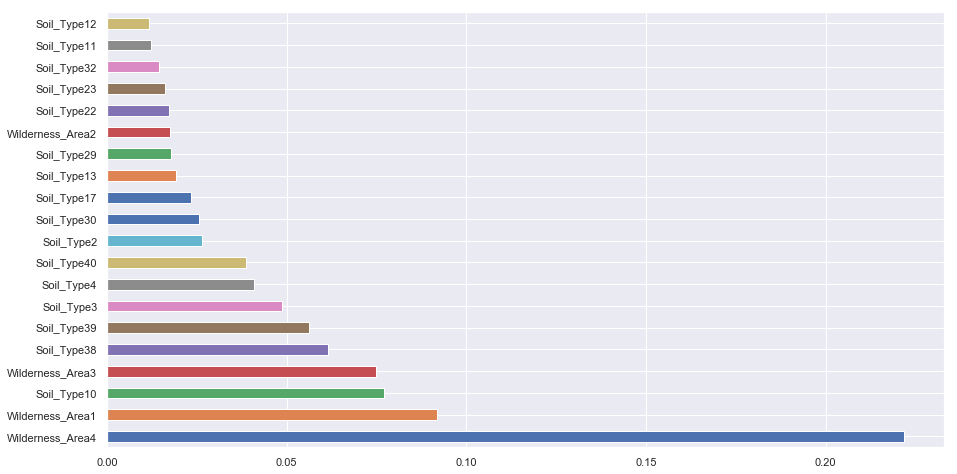

In [35]:
feat_importances = pd.Series(clf_cat_rf.feature_importances_, index=train_cat_x.columns)

plt.rcParams['figure.figsize'] = [15, 8]
feat_importances.sort_values().nlargest(20).plot(kind='barh')
plt.savefig('rf_cat_varImp.png')

In [36]:
#사전분석을 통한 결과를 토대로 변수를 선택한다.
x_variable_num=["Elevation","Horizontal_Distance_To_Roadways","Hillshade_9am","Horizontal_Distance_To_Hydrology","Horizontal_Distance_To_Fire_Points"]
x_variable_cat=["Wilderness_Area4","Wilderness_Area1","Wilderness_Area3","Soil_Type10","Soil_Type38","Soil_Type39"]
train_num_df[x_variable_num].reset_index(drop=True, inplace=True)
train_cat_df[x_variable_cat].reset_index(drop=True, inplace=True)

train_x_xg=pd.concat([train_num_df[x_variable_num],train_cat_df[x_variable_cat]],axis=1)

train_num_df.reset_index(drop=True, inplace=True)
train_cat_df.iloc[:,:-1].reset_index(drop=True, inplace=True)

train_x_trans_cat=pd.concat([train_num_df,train_cat_df.iloc[:,:-1]],axis=1)

In [37]:
train_x_xg.head()

,Elevation,Horizontal_Distance_To_Roadways,Hillshade_9am,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Wilderness_Area4,Wilderness_Area1,Wilderness_Area3,Soil_Type10,Soil_Type38,Soil_Type39
0,-0.333124,-1.050849,0.127692,0.436979,2.660631,0,1,0,0,0,0
1,-0.347866,-1.296662,0.086805,0.243070,2.643539,0,1,0,0,0,0
2,0.167820,1.144305,0.704811,0.476284,2.610301,0,1,0,0,0,0
3,0.122846,1.101616,0.900164,0.372114,2.639090,0,1,0,0,0,0
4,-0.335580,-1.294392,0.086805,-0.047739,2.626654,0,1,0,0,0,0


In [38]:
train_x_trans_cat.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,-0.333124,-0.929240,-1.994699,0.436979,-0.813135,-1.050849,0.127692,0.522247,0.256486,2.660631,...,0,0,0,0,0,0,0,0,0,0
1,-0.347866,-0.855788,-2.258050,0.243070,-1.042117,-1.296662,0.086805,0.696568,0.324383,2.643539,...,0,0,0,0,0,0,0,0,0,0
2,0.167820,0.056447,-0.860378,0.476284,0.331778,1.144305,0.704811,0.877686,-0.034945,2.610301,...,0,0,0,0,0,0,0,0,0,0
3,0.122846,0.194372,0.297617,0.372114,1.074683,1.101616,0.900164,0.877686,-0.321573,2.639090,...,0,0,0,0,0,0,0,0,0,0
4,-0.335580,-1.022553,-2.258050,-0.047739,-0.845792,-1.294392,0.086805,0.637715,0.301725,2.626654,...,0,0,0,0,0,0,0,0,0,0


In [39]:
train_y_xg=train["Cover_Type"]

In [41]:
#변수선택을 직접한 모델
xgb_model = xgb.XGBClassifier()
kfold = KFold(n_splits=10, random_state=523)
manual_results = cross_val_score(xgb_model, train_x_xg, train_y_xg, cv=kfold)
print('CV accuracy: %.3f +/- %.3f' % (manual_results.mean()*100, manual_results.std()*100))

CV accuracy: 68.353 +/- 4.550


In [42]:
#변수선택을 하지 않은 모델
results = cross_val_score(xgb_model, train_x_trans_cat, train_y_xg, cv=kfold)
print('CV accuracy: %.3f +/- %.3f' % (results.mean()*100, results.std()*100))

CV accuracy: 71.243 +/- 4.283


In [44]:
#랜텀 포레스트와도 비교/변수선택
clf_rf=RandomForestClassifier(n_estimators=211, criterion='entropy', random_state=523)
rf_manual_scores = cross_val_score(clf_rf,train_x_xg, train_y_xg, cv=10)
print('Scores =', rf_manual_scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(rf_manual_scores), np.std(rf_manual_scores)))

Scores = [0.68915344 0.79365079 0.77513228 0.7228836  0.76984127 0.71693122
 0.74933862 0.80026455 0.84920635 0.81746032]
CV accuracy: 0.768 +/- 0.047


In [45]:
#랜텀 포레스트와도 비교/모든 변수
rf_scores = cross_val_score(clf_rf,train_x_trans_cat, train_y_xg, cv=10)
print('Scores =', rf_scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(rf_scores), np.std(rf_scores)))

Scores = [0.70701058 0.7989418  0.78373016 0.72156085 0.76984127 0.75992063
 0.80026455 0.80753968 0.85449735 0.83399471]
CV accuracy: 0.784 +/- 0.044


In [47]:
clf_rf.fit(train_x_trans_cat, train_y_xg)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=211, n_jobs=None,
            oob_score=False, random_state=523, verbose=0, warm_start=False)

In [48]:
test_num_df.reset_index(drop=True, inplace=True)
test.iloc[:,11:].reset_index(drop=True, inplace=True)

test_trans_cat=pd.concat([test_num_df,test.iloc[:,11:]],axis=1)

In [52]:
pred_y_rf=clf_rf.predict(test_trans_cat)

array([2, 2, 2, 2, 2], dtype=int64)

In [54]:
sub=pd.DataFrame(test.iloc[:,0])
sub["Cover_Type"]=pred_y_rf

In [55]:
sub.to_csv("submission.csv",index=False)